# Redes Neuronales

Autor: Saúl Calderón, Juan Esquivel, Luis-Alexánder Calvo-Valverde

## Introducción

Ya hemos discutido sobre el uso de modelos lineales compuestos por combinaciones lineales de funciones base fijas. Un enfoque alternativo es utilizar un número definido de funciones básicas con parámetros personalizables, permitiendo a tales funcionales cambiar tales parámetros durante el entrenamiento. El modelo más exitoso para este tipo de contexto es la red de alimentación hacia adelante o *red feed-forward* o más comúnmente conocida como el perceptrón multi-capa.

El término de red neuronal tiene sus orígenes en los intintos de encontrar
representaciones matemáticas para el procesamiento de información
en los sistemas biológicos (McCulloch and Pitts, 1943; Widrow and
Hoff, 1960; Rosenblatt, 1962; Rumelhart et al., 1986)

## Funciones de alimentación hacia adelante o alimentación progresiva

Para los modelos de regresión y clasificación vistos anteriormente,
ya se analizó que están constituidos por combinaciones lineales de
funciones base no lineales *fijas*, es decir,  sin parámetros
que alteren su forma, dadas por $\phi_{j}$, con $\vec{x}\in\mathbb{R}^{D}$
el vector de características a clasificar, $\vec{w}$ el vector de
pesos para la combinación lineal de las funciones base $\phi_{j}$.
Para plantear con una sola expresión el problema de la regresión y
clasificación podemos escribir:

>\begin{equation}
y\left(\vec{x},\vec{w}\right)=f\left(\sum_{j=0}^{M}w_{j}\phi_{j}\left(\vec{x}\right)\right)
\label{eq:e1} \tag{1}
\end{equation}




donde en el caso de la regresión $f\left(u\right)$ corresponde a
la función identidad $f\left(u\right)=u$ y para el caso de la clasificación
$f\left(u\right)$ es una función no lineal, por ejemplo la función
escalón $f\left(u\right)=\begin{cases}
1 & u>0\\
0 & u\leq0
\end{cases}$. En general, a la función $f$ se le denomina **función de activación** . Recordemos que tanto en el problema de la regresión como
la clasificación, es necesario **estimar el arreglo de pesos**
$\vec{w}\in\mathbb{R}^{M}$.

Una extensión que incrementa la flexibilidad del modelo es hacer que
las funciones base $\phi_{j}$ presenten parámetros que les permitan
ser no fijas o adaptables, por lo que las funciones bases vendrían
dadas por $\phi_{j}\left(\vec{x},\vec{\theta}\right)$ con $\vec{\theta}\in\mathbb{R}^{D}$
**el arreglo de parámetros ajustables** en entrenamiento, lo
que hace necesario **encontrar los arreglos $\vec{\theta}$
y $\vec{w}$ durante el entrenamiento**.

Existen muchas formas the construir esas funciones paramétricas $\phi_{j}\left(\vec{x},\vec{\theta}\right)$.
Las redes neuronales usan como funciones base, funciones de forma
similares a lo planteado en la función 1, por lo que
una función base $\phi_{j}$ tiene la forma:



>$\phi_{j}\left(\vec{x},\vec{\theta}\right)=h\left(\sum_{i=0}^{D}\theta_{i}x_{i}\right)$



Por lo que:



>\begin{equation}
y\left(\vec{x},\vec{w}\right)=f\left(\sum_{j=0}^{M}w_{j}\:h\left(\sum_{i=0}^{D}\theta_{i}x_{i}\right)\right)
\label{eq:e2} \tag{2}
\end{equation}


Donde $h\left(u\right)$ **es una función no lineal y su entrada
$u$ viene dada por una combinación lineal** de las entradas con los pesos $\vec{\theta}$.
Veamos más detalladamente como están dadas tales funciones base, ilustrandolo con un grafo. Observe de izquierda a derecha la figura

![Diagrama de una red neuronal de dos capas (usualmente la capa de entrada
no se incluye)](https://drive.google.com/uc?export=view&id=1-3PDRWilTX3A644YHE7C2x7j5i0Afclm)

_Figura 1_

La red es escencialmente un grafo, usualmente de tres capas:


*  La capa de $D$ nodos de entrada, constituidos por los valores $x_{1},x_{2},\ldots,x_{D}$
del arreglo de entrada $\vec{x}\in\mathbb{R}^{D}$.
*   La capa de $M$ nodos $y_{0}^{o},y_{1}^{o},y_{2}^{o},\ldots,y_{M}^{o}$,
en notación vectorial dada por $\overrightarrow{y^{o}}\in\mathbb{R}^{M}$, llamada capa oculta, la cual controla el nivel de generalización de la red (suavidad de la superficie de decisión).
* La capa de salida, constituida por $K$ nodos $y_{1}^{s},\ldots,y_{K}^{s}$, con $\overrightarrow{y^{s}}\in\mathbb{R}^{K}$, lo cual corresponde al *número $K$ de clases por discriminar*, usando una notación
de la salida de $1-K$ o ***one hot vector***.



## La capa oculta

El grafo está definido por dos matrices de pesos $W^{o}\in\mathbb{R}^{D\times M}$
y $W^{s}\in\mathbb{R}^{M\times K}$ (se usará una notación en mayúscula
para implicar el uso de una matriz, aunque también se puede suponer
que $W$ es un vector con dos subindices), La primer matriz de pesos
conecta a la capa de entrada con la capa oculta, y la segunda matriz
conecta la capa oculta con la capa de salida.

Para cada nodo $j$ en la capa oculta, se define el **peso neto
o coeficiente de activación** $p_{m}^{o}$ el cual está dado por la
combinación lineal de los valores en los nodos de entrada:

\begin{equation}
p_{m}^{o}\left(\vec{x},W^{o}\right)=\sum_{d=1}^{D}W_{d,m}^{o}x_{d}+W_{0,m}^{o}   
\label{eq:e3} \tag{3}
\end{equation}

donde el peso $W_{0,m}^{o}$ comúnmente se refiere como **sesgo**,
por lo que para expresar al peso neto de la capa oculta $p_{m}^{o}$
como únicamente una combinación lineal sin sesgo o desplazamiento,
se reescribe:



> $p_{m}^{o}\left(\vec{x},W^{o}\right)=\sum_{d=0}^{D}W_{d,m}^{o}x_{d}$


se fija a $x_{0}=1$. El peso neto $p_{m}$ de la unidad o neurona
$m$ es transformado usando una **función de activación** no
lineal y diferenciable en la capa oculta $g^{o}\left(\cdot\right)$
para resultar en:

\begin{equation}
y_{m}^{o}\left(\vec{x},W^{o}\right)=g^{o}\left(p_{m}^{o}\left(\vec{x},W^{o}\right)\right)
\label{eq:e4} \tag{4}
\end{equation}

con lo cual se puede observar que la función $y_{m}^{o}$ corresponde
a la función base $\phi_{m}\left(\vec{x},\vec{\theta}\right)$,

> $\phi_{m}\left(\vec{x},\vec{\theta}\right)=h\left(\sum_{j=0}^{D}\theta_{j}x_{j}\right)$

con los parámetros de la función base dados por $\vec{\theta}=W^{o}$,
y con $h=g^{o}$ y . El valor de los nodos $y_{0}^{o},y_{1}^{o},y_{2}^{o},\ldots,y_{M}^{o}$
se les llama las **salidas de la capa oculta**.

La **función de activación** $h=g^{o}$ usualmente se escoge
para que sea suave (derivable), y denote el estado
de una neurona como activada o desactivada ante una entrada específica.
Como veremos, la condición de que la función de activación sea derivable,
es importante para poder calcular el gradiente y facilitar la minimización
del error de clasificación. Las funciones de activación comunmente
utilizadas son la tangente hiperbólica o la función sigmoidal, respectivamente
dadas por:

\begin{array}{cc}
\tanh\left(x\right)=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}} & \textrm{sigmoid}\left(x\right)=\frac{1}{1+e^{-x}}\\
\frac{\textrm{d}}{\textrm{d}x}\tanh\left(x\right)=1-\tanh^{2}\left(x\right) & \frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}}
\end{array}



Dado el uso extensivo que haremos de la función *sigmoidal*,
expresaremos su derivada de forma más compacta:
\begin{equation}
\frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}}=\frac{1}{\left(1+e^{-x}\right)}\frac{e^{-x}}{\left(1+e^{-x}\right)}
\end{equation}
donde tomando el término derecho de tal multiplicación:

> $\frac{e^{-x}}{\left(1+e^{-x}\right)}=\frac{1+e^{-x}-1}{\left(1+e^{-x}\right)}$
> $\Rightarrow\frac{1+e^{-x}}{\left(1+e^{-x}\right)}-\frac{1}{\left(1+e^{-x}\right)}=\left(1-\frac{1}{\left(1+e^{-x}\right)}\right)$

por lo que entonces la ecuación se puede
reescribir como:
> $
\frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\frac{e^{-x}}{\left(1+e^{-x}\right)^{2}}=\frac{1}{\left(1+e^{-x}\right)}\left(1-\frac{1}{\left(1+e^{-x}\right)}\right)
$

lo cual significa que:
\begin{equation}
\frac{\textrm{d}}{\textrm{d}x}\textrm{sigmoid}\left(x\right)=\textrm{sigmoid}\left(x\right)\left(1-\textrm{sigmoid}\left(x\right)\right)
\label{eq:e5} \tag{5}
\end{equation}

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


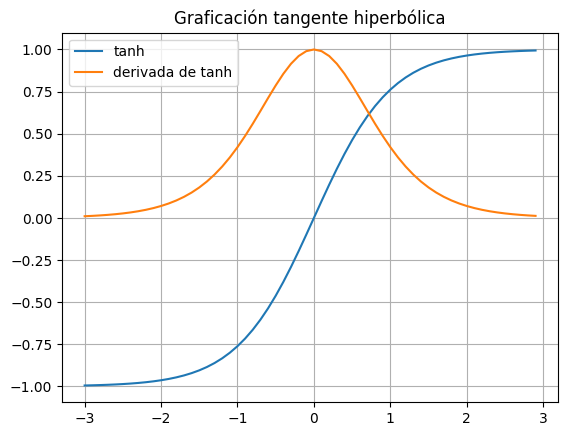

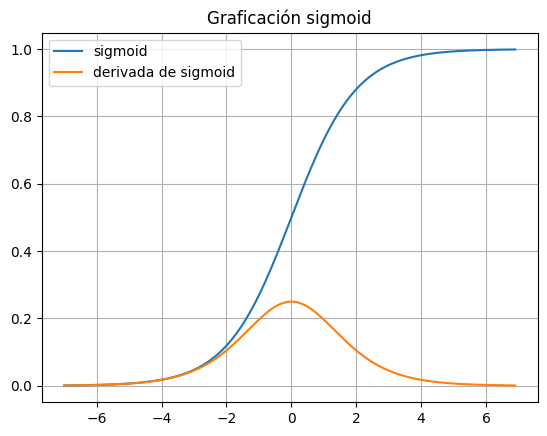

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

x = np.arange(-3.0, 3.0, 0.10)
y = []
for i in x:
    y.append(np.tanh(i))
y = np.array(y)
plt.plot(x,y, label="tanh")
z = []
for i in x:
    z.append(1-np.tanh(i)**2)
z = np.array(z)
plt.plot(x,z, label="derivada de tanh")
plt.xlabel('')
plt.ylabel('')
plt.title('Graficación tangente hiperbólica')
plt.legend()
plt.grid(True)
plt.show()

def sigmoid(pX):
    r = 1. / (1. + math.e**(-pX))
    return r

def derSigmoid(pX):
    r =  sigmoid(pX) * (1. - sigmoid(pX))
    return r

plt.clf()
x = np.arange(-7.0, 7.0, 0.10)
y = [ sigmoid(i)  for i in x]
z = [ derSigmoid(i)  for i in x]
plt.plot(x,y, label="sigmoid")
plt.plot(x,z, label="derivada de sigmoid")
plt.xlabel('')
plt.ylabel('')
plt.title('Graficación sigmoid')
plt.legend()
plt.grid(True)
plt.show()


## La capa de salida


Siguiendo el grafo de la red neuronal en la Figura 1,
se define el peso neto para la unidad de salida $\textbf{k}$ como:

\begin{equation}
p_{k}^{s}\left(\vec{x},W^{s}\right)=\sum_{m=0}^{M}W_{m,k}^{s}y_{m}^{o}
\label{eq:etiq6} \tag{6}
\end{equation}

para cada unidad $k=1,\ldots,K$, donde de manera similar para la
capa anterior, $y_{0}^{o}=1$. Observe que el peso neto de una unidad
o neurona en la capa de salida está dado por la **combinación
lineal de las salidas en las unidades ocultas**, usando los pesos definidos
entre la capa oculta y de salida. La **salida de cada unidad
de la capa de salida**, está dada por:

$
y_{k}^{s}\left(\vec{x},W^{s}\right)=g^{s}\left(p_{k}^{s}\left(\vec{x},W^{s}\right)\right)
$

donde la función de activación $g^{s}\left(u\right)$ para las unidades
de salida se elige usualmente según los siguientes casos:


## Funciones de activación



* Para la regresión (clasificación en dominio continuo) se escoge la **función identidad**, de modo que $g^{s}\left(u\right)=u$
o **lineal**.

* Para la clasificación binaria o de dos clases donde entonces $K=2$, se utiliza una función de activación de **tangente hiperbólico
o sigmoidal**. Esto pues la red neuronal utiliza una codificación de la salida $1-K$, de modo que si por ejemplo la red quiere dar a entender
que una entrada $\vec{x}_{a}$ corresponde a la clase $1$, entonces las unidades de salida  deben representar lo anterior con $y_{1}\approx1$ y $y_{2}\approx0$, y en caso de corresponder a la clase $2$, $y_{1}\approx0$ y $y_{2}\approx1$.

* Para la clasificación en múltiples clases $K>2$ usualmente se utiliza la función **softmax** o la de **tangente hiperbólico** anteriormente
vista. La función softmax asocia sus entradas a un valor de salida $0\leq y_{k}^{s}\leq1$. La función softmax denota
la probabilidad de que dado los valores de la muestra $\vec{x}$ , la misma sea de la clase $C_{k}$, $\textrm{softmax}\left(\vec{p^{s}},p_{k}^{s}\right)=p\left(C_{k}|\vec{p^{s}}\right)$
y está dada por:
> $\textrm{softmax}\left(\vec{p^{s}},p_{k}^{s}\right)=\frac{e^{p_{k}^{s}}}{\sum_{j}e^{p_{j}^{s}}}.$

La función softmax no es más que la normalización respecto
a las demás salidas de las unidades en la capa anterior, para $K>2$
clases de la función sigmoidal. La función de activación
sigmoidal sólo toma en cuenta el peso neto de su unidad, y no de las
demás unidades en la misma capa:

>$\textrm{sigmoid}\left(p_{k}^{s}\right)=\frac{1}{1+e^{-p_{k}^{s}}}$



Por ejemplo, en el arreglo de coeficientes de activación
 dado por $\vec{p^{s}}=\begin{bmatrix}3\\
2\\
1
\end{bmatrix}$, donde en este caso el compontente $p_{1}^{s}$ es el mayor y debe
asignársele la mayor probabilidad, por lo que al hacer que $y_{k}\left(\vec{p^{s}},p_{k}^{s}\right)=\textrm{softmax}\left(\vec{p^{s}},p_{k}^{s}\right)$
para todos los valores $p_{k}^{s}$ resulta en
>>$
\vec{y}_{\textrm{softmax}}=\begin{bmatrix}0.6652\\
0.2447\\
0.0900
\end{bmatrix}\qquad\vec{y}_{\textrm{sigmoid}}=\begin{bmatrix}0.9526\\
0.8808\\
0.7311
\end{bmatrix}
$

>donde se observa como la salida de la función *softmax* da
un valor mucho más bajo al tercer componente cuando se compara con
la función *sigmoidal*.


In [3]:
import numpy as np

a = np.array([3, 2, 1]);
ySoftmax = np.zeros(a.size)
ySigmoid = np.zeros(a.size)
print('Input vector: ')
print(a)

ySoftmax[0] = np.exp(a[0])/ np.sum(np.exp(a));
ySoftmax[1] = np.exp(a[1])/ np.sum(np.exp(a));
ySoftmax[2] = np.exp(a[2])/ np.sum(np.exp(a));
print('Softmax output: ')
print(ySoftmax)

# Salida con la funcion sigmoidal
ySigmoid[0] = 1 / (1 + np.exp(-a[0]))
ySigmoid[1] = 1 / (1 + np.exp(-a[1]))
ySigmoid[2] = 1 / (1 + np.exp(-a[2]))
print('Sigmoid output: ')
print(ySigmoid)

Input vector: 
[3 2 1]
Softmax output: 
[0.66524096 0.24472847 0.09003057]
Sigmoid output: 
[0.95257413 0.88079708 0.73105858]


La red no debe tener ciclos, aunque puede incluir conexiones entre capas no consecutivas.

Una cantidad menor de neuronas en la capa oculta respecto a la cantidad de neuronas de entrada implica una reducción de dimensionalidad, disminuyendo el riesgo de sobre-ajuste.

Como se mencionó, las redes neuronales son conocidas también como **perceptrones multicapa**, con la diferencia principal de que las redes neuronales usan funciones de activación sigmoidales no lineales, mientras que el perceptrón usa una función de escalón o *Heaviside* (0 si x es menor que cero, y 1 de lo contrario), lo que permite que al conectar múltiples perceptrones en se serie, la función de salida de la red sea **diferenciable**, facilitando el proceso de entrenamiento.


## Entrenamiento de la red

Se seguirá con la misma terminología planteada para los problemas
de regresión lineal y clasificación en dos categorías analizados anteriormente.
En el problema de clasificación, se define entonces una matriz de
muestras de entrada

$
X=\begin{bmatrix}| & | & | & \text{|}\\
\vec{x}_{1} & \vec{x}_{2} & \ldots & \vec{x}_{N}\\
| & | & | & |
\end{bmatrix}
$

 (lo que corresponde a una manera de representar al conjunto de $N$
vectores de entrenamiento $\left\{ \vec{x}_{1},\ldots,\vec{x}_{N}\right\} $)
y el conjunto correspondiente de vectores de etiquetas (conocido de
antemano), representado en la matriz

$
T=\begin{bmatrix}| & | & | & \text{|}\\
\vec{t}_{1} & \vec{t}_{2} & \ldots & \vec{t}_{N}\\
| & | & | & |
\end{bmatrix}.
$

 La notación general para un modelo de clasificación está dada por
$y\left(\vec{x},\vec{w}\right)=f\left(\sum_{j=1}^{M}w_{j}\phi_{j}\left(\vec{x}\right)\right)$,
donde en el caso de la red neuronal de dos capas, los pesos a determinar
están dados por dos matrices $W^{o}$ y $W^{s}$ y la función de activación
$f=g^{s}$ es una función no lineal. Tal cual se procedió anteriormente
para los clasificadore lineales, el objetivo para construir un clasificador
es **encontrar el vector de pesos $\vec{w}$ que minimice la
función de error** cuadrático (lo que corresponde a maximizar la función
de verosimilitud):

$
E\left(\vec{w}\right)=\frac{1}{2}\sum_{n=1}^{N}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-\vec{t}_{n}\right\Vert ^{2},
$

donde se observa que efectivamente la función $E\left(\vec{w}\right)$
tiene su dominio en $\mathbb{R}^{2}$ y su codominio en $\mathbb{R}$,
una función multivariable para la cual podemos calcular sus derivadas parciales.

El mínimo en una función multivariable como el caso de
la función $E\left(\vec{w}\right)$ ocurre cuando el gradiente tiende
a cero:

$
\nabla E\left(\vec{w}_{\textrm{opt}}\right)=0,
$

El objetivo de la búsqueda es encontrar un vector gradiente con magnitud lo suficientemente pequeña,
determinada por $\epsilon$:

$
\left\Vert \nabla E\left(\vec{w}\right)\right\Vert <\epsilon.
$


Dado que no es posible encontrar una solución analítica a la ecuación

$
\nabla E\left(\vec{w}\right)=0,
$

es necesario utilizar métodos numéricos para ello. La optimización
de funciones continuas no lineales es un problema muy estudiado y
existen muchas técnicas para lograr tal objetivo. Muchas de las técnicas
involucran la elección de un valor inicial para el vector de pesos
$\vec{w}_{0}\in\mathbb{R}^{M}$, y con una serie de iteraciones cambiar
tal vector *moviéndose* por el espacio $\mathbb{R}^{M}$.

Para más información sobre el algoritmo de retropropagación
y sus orígenes, puede ver http://people.idsia.ch/~juergen/who-invented-backpropagation.html.

## Optimización de los pesos por descenso de gradiente y retropropagación

El enfoque más sencillo para escoger al vector de actualización $\triangle\vec{w}\left(\tau\right)$
es hacerlo igual al negativo del vector gradiente de modo que $\triangle\vec{w}\left(\tau\right)=-\nabla E\left(\vec{w}\left(\tau\right)\right)$,
por lo que entonces:

$
\vec{w}\left(\tau+1\right)=\vec{w}\left(\tau\right)-\alpha\:\nabla E\left(\vec{w}\left(\tau\right)\right).
$

 Es común realizar varias corridas en las que el vector inicial $\vec{w}_{0}$
se fija con distintos valores aleatorios.

En las redes neuronales de múltiples capas, recordemos que tenemos
al menos dos matrices de pesos a optimizar ($W^{o}$ y $W^{s}$) por
lo que al proceso de aplicar el descenso de gradiente desde la capa
de salida hacia la capa de entrada se le conoce como **retro-propagación
del error**. El proceso de entrenamiento de retropropagación con descenso
de gradiente se puede dividir en las siguientes etapas:

* Propagación del error para calcular las derivadas parciales desde
la capa de salida hacia la entrada (hacia atrás).
* Utilizar el resultado del gradiente evaluado desde la entrada para
computar los ajustes a realizar en los pesos, lo que corresponde a
la aplicación de la técnica de **descenso del gradiente**.


Cabe destacar que esta técnica de retro-propagación del error puede
ser combinada con cualquier otro método para fijar el valor nuevo
del gradiente, por lo que es importante distinguir las dos etapas.

Retomando entonces la ecuación del error definida como:


$
E\left(\vec{w}\right)=\frac{1}{2}\sum_{n=1}^{N}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-\vec{t}_{n}\right\Vert ^{2},
$

para facilitar su análisis la podemos reescribir como:

$
E\left(\vec{w}\right)=\sum_{n=1}^{N}E_{n}\left(\vec{w}\right)
$

con

$
E_{n}\left(\vec{w}\right)=\frac{1}{2}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-t_{n}\right\Vert ^{2}
$

 definido como el error de clasificación para una muestra $\vec{x}_{n}$
o **función de pérdida** (*loss function*). Con el mismo
afán de simplificar el análisis, examinaremos posteriormente el aprendizaje
de cada capa, desde la capa de salida a la oculta.

## Funciones de pérdida

La función de pérdida define la superficie de error, y qué aspectos
de la estimación pesan en la contribución de tal error. La salida
del modelo para categorizar $K$ clases viene dada por un arreglo:

$
\vec{y}=y\left(\vec{x}_{n},\vec{w}\right)
$

con dimensionalidad $\vec{y}\in\mathbb{R}^{K}$, utilizando una representación
de la salida *1-K*.  Así por ejemplo, para un modelo construído
con el objetivo de discriminar imágenes en 3 categorías (por ejemplo
la clasificación de imágenes de carros en categorías de Toyota, Tesla
y Peugeot), una etiqueta del conjunto de etiquetas $T$ como por ejemplo
$\vec{t}_{a}=\left[1\:0\:0\right]^{T}$, por lo que si nuestro modelo
produce una salida $\vec{y}_{a}=y\left(\vec{x}_{a},\vec{w}\right)=\left[0.5\:0.4\:0\right]^{T}$,
el modelo debe modificar sus parámetros $\vec{w}$ para hacer que
$\vec{y}$ se acerque lo más posible a $\vec{t}$. Pero **cómo
se puede medir la cercanía** de $\vec{y}$ con $\vec{t}$? Las distancias
$\ell=p$ son posibles opciones, sin embargo, es deseable utilizar
un criterio que tome en cuenta además la naturaleza excluyente de
la clasificación, es decir, si se asigna una probabilidad alta de
pertenencia a la muestra $\vec{x}_{a}$ a una categoría específica
$c$, el resto de categorías deben asignarseles probabilidades bajas
de pertenencia.


## Aprendizaje en la capa de salida

El cambio en el vector de pesos de la capa de salida $W^{s}$, analizado
por cada componente o entrada de la matriz:

\begin{equation}
W_{m,k}^{s}\left(\tau+1\right)=W_{m,k}^{s}\left(\tau\right)-\alpha\:\triangle W_{m,k}^{s}\left(\tau\right)
\end{equation}

donde el vector de actualización según el método del descenso de gradiente
está dado por:

\begin{equation}
\triangle W_{m,k}^{s}\left(\tau\right)=\frac{\textrm{d}}{\textrm{d}W_{m,k}^{s}}\left(\sum_{n=1}^{N}E_{n}\left(W_{m,k}^{s}\right)\right)
\end{equation}

Para simplificar la notación, para una muestra $n$, se define el
*delta o cambio de aprendizaje* $\delta_{k}^{s}$ como:

$
\delta_{k',n}^{s}=\left(y_{k',n}^{s}-t_{k',n}\right)\,\left(y_{k',n}^{s}\left(1-y_{k',n}^{s}\right)\right),
$

de esta manera, la actualización del peso $W_{m',k'}^{s}$ vendría
dada por cada muestra
como:
\begin{equation}
W_{m',k'}^{s}\left(\tau+1\right)=W_{m',k'}^{s}\left(\tau\right)-\alpha\:\triangle W_{m',k'}^{s}\left(\tau\right)
\label{eq:e13} \tag{13}
\end{equation}

con

$
\triangle W_{m',k'}^{s}\left(\tau\right)=\delta_{k',n}^{s}\,y_{m',n}^{o}.
$

Tal notación facilitará la propagación del error como se verá posteriormente.

## Aprendizaje en la capa oculta

Se había definido en el aprendizaje de la capa de salida el delta $\delta_{k,n}^{s}=\left(y_{k,n}^{s}-t_{k,n}\right)\,\left(y_{k,n}^{s}\left(1-y_{k,n}^{s}\right)\right),$

Basado en lo anterior, podemos definir el delta en la capa oculta
como:

$
\delta_{m',n}^{o}=\left(\sum_{k=0}^{K}\delta_{k,n}^{s}\,W_{m',k}^{s}\right)\left(y_{m',n}^{o}\left(1-y_{m',n}^{o}\right)\right)
$

y de manera análoga para la notación en la capa anterior, respecto
a la ecuación de aprendizaje $W_{d',m'}^{o}\left(\tau+1\right)=W_{d',m'}^{o}\left(\tau\right)-\alpha\:\triangle W_{d',m'}^{o}\left(\tau\right),$
definimos:

$
\triangle W_{d',m'}^{o}\left(\tau\right)=\delta_{m',n}^{o}\,x_{d'}
$


## Criterio de parada

El criterio de parada puede fijarse como un número de iteraciones
$P$ a cumplir, o un máximo porcentaje de las muestras a clasificar
incorrectamente.

## Ejemplo de entrenamiento

La Figura siguiente muestra una red
neuronal con una entrada $\vec{x}\in\mathbb{R}^{2}$ (con $D=2$,
sin incluir la neurona con valor unitario), con $\vec{y^{o}}\in\mathbb{R}^{2}$
(con $D=2$, sin incluir la neurona con valor unitario) y $\vec{y^{s}}\in\mathbb{R}^{1}$
($K=1$ denotando la pertenencia a una clase $C=1$ y la no pertenencia
a la misma). A continuación se definen los valores de la entrada y
los pesos en la capa oculta y de salida (los cuales se pueden suponer
fueron inicializados aleatoriamente):
\[
\begin{array}{cccc}
x_{0}=1 & t_{1}=0 & W_{0,1}^{o}=-1 & W_{0,1}^{s}=-1\\
x_{1}=0 &  & W_{0,2}^{o}=0 & W_{1,1}^{s}=-2\\
x_{2}=1 &  & W_{1,1}^{o}=3 & W_{2,1}^{s}=3\\
 &  & W_{1,2}^{o}=-2\\
 &  & W_{2,1}^{o}=1\\
 &  & W_{2,2}^{o}=2
\end{array}
\]

Suponga que $\alpha=1$.


![Ejemplo de una red neuronal de dos capas](https://drive.google.com/uc?export=view&id=1bWufPv4UTWKBdb5tYf5PUFWt7Wyp4mYa)


Para actualizar los pesos de la red para la iteración $\tau=1$, realizamos
las dos etapas: pasada hacia adelante y retropropagación del error

**Pasada hacia adelante:** A partir de los datos anteriores, calculamos primero los pesos netos
para la capa oculta:


$
\begin{array}{cc}
p_{1}^{o}= & W_{0,1}^{o}\,x_{0}+W_{1,1}^{o}\,x_{1}+W_{2,1}^{o}\,x_{2}=-1*1+3*0+1*1=0\\
p_{2}^{o}= & W_{0,2}^{o}\,x_{0}+W_{1,2}^{o}\,x_{1}+W_{2,2}^{o}\,x_{2}=0*1+-2*0+2*1=2
\end{array}
$

para posteriormente calcular la salida de cada unidad oculta:


$
\begin{array}{c}
\Rightarrow y_{1}^{o}=g^{o}\left(p_{1}^{o}\right)=\frac{1}{\left(1+e^{0}\right)}=0.5\\
\Rightarrow y_{2}^{o}=g^{o}\left(p_{2}^{o}\right)=\frac{1}{\left(1+e^{-2}\right)}=0.8808
\end{array}
$


Respecto a la capa de salida se tiene que:

$
\begin{array}{cc}
p_{1}^{s}= & W_{0,1}^{s}\,y_{0}^{o}+W_{1,1}^{s}\,y_{1}^{o}+W_{2,1}^{s}\,y_{2}^{o}=-1*1+-2*0.5+3*0.8808=0.6424\end{array}
$


$
\begin{array}{c}
\Rightarrow y_{1}^{s}=g^{s}\left(p_{1}^{s}\right)=\frac{1}{\left(1+e^{-0.64}\right)}=0.6553\end{array}
$



**Pasada hacia atrás y actualización de los pesos:** Para la capa de salida, calculamos el delta de la única unidad como:

$
\delta_{1}^{s}=\left(y_{1}^{s}-t_{1,1}\right)\,\left(y_{1}^{s}\left(1-y_{1}^{s}\right)\right)=\left(0.6553-0\right)\left(0.6553\,\left(1-0.6553\right)\right)=0.148
$


Con base al cálculo del delta para la capa de salida, se actualizan
los pesos en la capa de salida según la ecuación

$
W_{m,k}^{s}\left(\tau+1\right)=W_{m,k}^{s}\left(\tau\right)+\triangle W_{m,k}^{s}=W_{m,k}^{s}\left(\tau\right)-\alpha\:\delta_{k}^{s}\,y_{m}^{o}
$

:

$
\begin{array}{c}
W_{0,1}^{s}\left(\tau+1\right)=W_{0,1}^{s}\left(\tau\right)-1\:\delta_{1}^{s}\,y_{0}^{o}=-1-0.148*1=-1-0.148*1=-1-0.148=-1.148\\
W_{1,1}^{s}\left(\tau+1\right)=W_{1,1}^{s}\left(\tau\right)-1\:\delta_{1}^{s}\,y_{1}^{o}=-2-0.148*0.5=-2-0.0740=-2.074\\
W_{2,1}^{s}\left(\tau+1\right)=W_{2,1}^{s}\left(\tau\right)-1\:\delta_{1}^{s}\,y_{2}^{o}=3-0.148*0.8808=3-0.1304=2.8696
\end{array}
$


Y para la capa oculta tenemos de forma similar, el delta para las
dos unidades:

$
\delta_{1}^{o}=\left(\sum_{k=1}^{K=1}\delta_{k}^{s}\,W_{1,k}^{s}\right)\left(y_{1}^{o}\left(1-y_{1}^{o}\right)\right)=(0.148*-2)*(0.5*(1-0.5))=-0.0740
$


$
\delta_{2}^{o}=\left(\sum_{k=1}^{K=1}\delta_{k}^{s}\,W_{2,k}^{s}\right)\left(y_{2}^{o}\left(1-y_{2}^{o}\right)\right)=(0.148*3)*(0.8808*(1-0.8808))=0.0466
$


Por lo que los pesos nuevos para la capa oculta según la ecuación

$
W_{d,m}^{o}\left(\tau+1\right)=W_{d,m}^{o}\left(\tau\right)+\triangle W_{d,m}^{o}=W_{d,m}^{o}\left(\tau\right)-\alpha\:\delta_{m}^{o}\,x_{d},
$

 vienen dados por:

 $
\begin{array}{c}
W_{0,1}^{o}\left(\tau+1\right)=W_{0,1}^{o}\left(\tau\right)-1\:\delta_{1}^{o}\,x_{0}=-1+1*0.074*1=-1+0.074=-0.926\\
W_{1,1}^{o}\left(\tau+1\right)=W_{1,1}^{o}\left(\tau\right)-1\:\delta_{1}^{o}\,x_{1}=3+1*0.074*0=3+0=3\\
W_{2,1}^{o}\left(\tau+1\right)=W_{2,1}^{o}\left(\tau\right)-1\:\delta_{1}^{o}\,x_{2}=1+1*0.074*1=1+0.074=1.074\\
W_{0,2}^{o}\left(\tau+1\right)=W_{0,2}^{o}\left(\tau\right)-1\:\delta_{2}^{o}\,x_{0}=0-1*0.0466*1=0-0.0466=-0.0466\\
W_{1,2}^{o}\left(\tau+1\right)=W_{1,2}^{o}\left(\tau\right)-1\:\delta_{2}^{o}\,x_{1}=-2-1*0.0466*0=-2-0=-2\\
W_{2,2}^{o}\left(\tau+1\right)=W_{2,2}^{o}\left(\tau\right)-1\:\delta_{2}^{o}\,x_{2}=2-1*0.0466*1=2-0.0466=1.9534
\end{array}
$


## Descenso de gradiente estocástico


En la ecuación general de actualización de los pesos:
\begin{equation}
\vec{w}\left(\tau+1\right)=\vec{w}\left(\tau\right)-\alpha\:\nabla E\left(\vec{w}\left(\tau\right)\right)
\end{equation}
se estableció que el gradiente de error se calcula sobre las $N$
muestras que conforman el conjunto de muestras de entrenamiento:

$
E\left(\vec{w}\right)=\frac{1}{2}\sum_{n=1}^{N}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-\vec{t}_{n}\right\Vert ^{2},
$

para facilitar su análisis la podemos reescribir como:

$
E\left(\vec{w}\right)=\sum_{n=1}^{N}E_{n}\left(\vec{w}\right)
$

donde $E_{n}=\frac{1}{2}\left\Vert y\left(\vec{x}_{n},\vec{w}\right)-t_{n}\right\Vert ^{2}$,
correspondiente al error en una sola muestra. Con esto la Ecuación
anterior se re-escribe como:
\begin{equation}
\vec{w}\left(\tau+1\right)=\vec{w}\left(\tau\right)-\alpha\:\frac{1}{Q}\left(\sum_{n=1}^{Q}\nabla E_{n}\left(\vec{w}\right)\right)
\end{equation}
Se recomienda normalizar el aporte de cada muestra al cambio del gradiente
(multiplicando por $\frac{1}{Q}$), para evitar que los *saltos*
en la superficie de error dependan de la cantidad de muestras en
el conjunto de datos.

Respecto a la cantidad y las muestras del conjunto de entrenamiento
$Q$, se definen tres enfoques de entrenamiento distintos:


1. Descenso de gradiente en el lote: $Q=N$, en este caso, se toman en
cuenta todas las muestras del conjunto de muestras de entrenamiento
$N$, sin ningún criterio estocástico.
2. Descenso de gradiente estocástico en línea: $Q=1$. Se escoge una
sola muestra aleatoria para posteriormente actualizar los pesos.
3. Descenso de gradiente estocástico por mini-lotes: $1<Q<N$. En este
caso se construye un sub-conjunto de las $N$ muestras de entrenamiento
para realizar el entrenamiento. Cuando $Q\rightarrow1$, la señal
de error de la función tenderá a ser más ruidosa, e inestable, mientras
que si $Q\rightarrow N$, la señal será más estable, pero tardará
más en converger. $Q$ corresponde a la **cantidad de muestras
del mini-lote**.

De esta forma, el algoritmo de entrenamiento generalizado, para $R$
pasadas o epochs, está dado por:


1. $\tau\leftarrow0$
2. Mientras $\tau < R$:

>2.1 $\vec{w}\left(\tau+1\right)\leftarrow\vec{w}\left(\tau\right)-\alpha\:\frac{1}{Q}\left(\sum_{n=1}^{Q}\nabla E_{n}\left(\vec{w}\right)\right)$

>2.2 $\tau\leftarrow\tau+1$

**Puede consultar:**
- A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size: https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
- An overview of gradient descent optimization algorithms: https://ruder.io/optimizing-gradient-descent/
- How to Control the Stability of Training Neural Networks With the Batch Size : https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/

## Ajuste de parámetros y regularización en redes neuronales

Sin embargo, el error de generalización no es una simple función de
$M$, por la existencia de mínimos locales, por lo que se recomienda
realizar una gráfica del error en un **conjunto de datos de
validación** para evaluar el mejor modelo en función de $M$. Otra
alternativa consisten en implementar una regularización como la analizada
para el caso de la regresión polinomial, con una ecuación del error
modificado como y fijando un $M$ relativamente grande:

$
\widetilde{E}\left(\vec{w}\right)=E\left(\vec{w}\right)+\frac{\lambda}{2}\vec{w}^{T}\vec{w}
$


Una heurística común es fijar el número de neuronas en la capa oculta
$M$ en el siguiente rango:

$
\frac{D}{2}\leq M\leq2D
$

donde usualmente se consiguen los menores errores en el conjunto de
datos de validación con valores menores.